In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
# Képsorozat elérési útvonala (a képeknek ugyanazt a könyvtárat kell tartalmazniuk)
image_sequence_path = 'images'  # Cseréld le a képsorozat könyvtárának elérési útvonalára
image_extension = '*.png'


In [ ]:
# Ellenőrizzük, hogy az elérési útvonal létezik-e
if not os.path.exists(image_sequence_path):
    print("Hiba: A megadott elérési útvonal nem létezik.")
    exit()



In [3]:
# Képek beolvasása a sorozatból és sebességkiszámítás
velocities_x = []
velocities_y = []

# Képsorozat feldolgozása
image_files =  glob.glob(os.path.join(image_sequence_path, image_extension))
image_files

['images\\000.png',
 'images\\001.png',
 'images\\002.png',
 'images\\003.png',
 'images\\004.png',
 'images\\005.png',
 'images\\006.png',
 'images\\007.png',
 'images\\008.png',
 'images\\009.png',
 'images\\010.png',
 'images\\011.png',
 'images\\012.png',
 'images\\013.png',
 'images\\014.png',
 'images\\015.png',
 'images\\016.png',
 'images\\017.png',
 'images\\018.png',
 'images\\019.png',
 'images\\020.png',
 'images\\021.png',
 'images\\022.png',
 'images\\023.png',
 'images\\024.png',
 'images\\025.png',
 'images\\026.png',
 'images\\027.png',
 'images\\028.png',
 'images\\029.png',
 'images\\030.png',
 'images\\031.png',
 'images\\032.png',
 'images\\033.png',
 'images\\034.png',
 'images\\035.png',
 'images\\036.png',
 'images\\037.png',
 'images\\038.png',
 'images\\039.png',
 'images\\040.png',
 'images\\041.png',
 'images\\042.png',
 'images\\043.png',
 'images\\044.png',
 'images\\045.png',
 'images\\046.png',
 'images\\047.png',
 'images\\048.png',
 'images\\049.png',


In [4]:
prev_image = None

In [5]:
for i in range(10):  # Csak az első 10 képet dolgozzuk fel (000.png-től 009.png-ig)
    image_file = f"{i:03d}.png"  # Képfájl neve 3 számjeggyel
    image_path = os.path.join(image_sequence_path, image_file)
    frame = cv2.imread(image_path)
    if frame is None:
        continue

    # Szürkeárnyalatos konverzió
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Az optikai áramlás kiszámítása a képeken
    if prev_image is not None:
        flow = cv2.calcOpticalFlowFarneback(prev_image, frame_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        vx = np.mean(flow[..., 0])
        vy = np.mean(flow[..., 1])
        velocities_x.append(vx)
        velocities_y.append(vy)

    prev_image = frame_gray
    print(image_path)

images\000.png
images\001.png
images\002.png
images\003.png
images\004.png
images\005.png
images\006.png
images\007.png
images\008.png
images\009.png


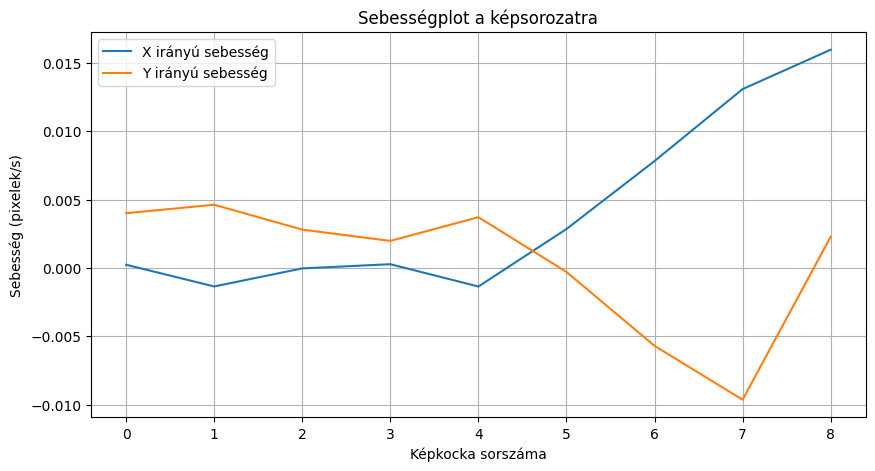

In [7]:
# Sebességplot készítése
plt.figure(figsize=(10, 5))
plt.plot(range(len(velocities_x)), velocities_x, label='X irányú sebesség')
plt.plot(range(len(velocities_y)), velocities_y, label='Y irányú sebesség')
plt.xlabel('Képkocka sorszáma')
plt.ylabel('Sebesség (pixelek/s)')
plt.legend()
plt.title('Sebességplot a képsorozatra')
plt.grid(True)

# Plot megjelenítése
plt.show()